### 라이브러리 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow.experimental.numpy as tnp

In [3]:
tnp.experimental_enable_numpy_behavior()

### Grid Search의 문제

- 최적을 값을 찾기위해 임의로 범위를 지정했을 때 그 범위 안에 optimal한 값이 존재 하지 않을 수 있음. -> 넓은 범위를 탐색하고 싶음.
- 비효율적임. 모든 값을 일일이 다 찾아야하고, 최적의 값을 찾았음에도 불구하고 탐색 계속 진행..

### 경사하강법을 이용한 최솟값 찾기

- 임의의 값을 세팅하고 그 값을 기준으로 조금씩 값을 증가 혹은 갑소시킨 후 loss 가 더 적은 쪽으로 움직이면서 최적의 값 찾기

$$y=(x-1)^2$$

정답: $x=1$임 (접선의 기울기 0이 되는 값)

(1) x= -3 으로 세팅

In [4]:
(-3-1)**2

16

In [5]:
print((-2.99-1)**2)
print((-3.01-1)**2)

15.920100000000001
16.080099999999998


-> 오른쪽으로 이동하는 것이 유리

In [6]:
# x 세팅
x = tf.Variable(-3.0)

# x = -3일 때 loss값 계산
with tf.GradientTape(persistent=True) as tape:
    loss = (x-1)**2
    
# x에 대하여 미분    
tape.gradient(loss, x)

<tf.Tensor: shape=(), dtype=float32, numpy=-8.0>

- **시도1** \
0.01만큼 오른쪽 이동

In [7]:
alpha = 0.01 / 8
x = tf.Variable(-3.0)

for k in range(100):
    with tf.GradientTape(persistent=True) as tape:
        loss = (x-1)**2
    x.assign_sub(alpha * tape.gradient(loss, x))

In [8]:
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.1142282>

- **시도2** \
0.1만큼 오른쪽 이동

In [9]:
alpha = 0.1 / 8
x = tf.Variable(-3.0)

for k in range(100):
    with tf.GradientTape(persistent=True) as tape:
        loss = (x-1)**2
    x.assign_sub(alpha * tape.gradient(loss, x))
    
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.68193084>

- **시도3** \
0.05 만큼 오른쪽 이동

In [10]:
alpha = 0.05 / 8
x = tf.Variable(-3.0)

for k in range(100):
    with tf.GradientTape(persistent=True) as tape:
        loss = (x-1)**2
    x.assign_sub(alpha * tape.gradient(loss, x))
    
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.13702613>

### 시각화

In [11]:
# x_list = list(range(-3,2))
# loss_list= [(k-1)**2 for k in x_list]

In [12]:
# x 및 alpha 정의 
x = tf.Variable(-3.0)
alpha = 0.05 / 8

# 빈 리스트 생성
x_list = []
loss_list=[]

# 초기 값으로 리스트 채우기
x_list.append(x.numpy())
loss_list.append((x.numpy()-1)**2)


In [13]:
x_list, loss_list

([-3.0], [16.0])

In [14]:
x = tf.Variable(-3.0)
alpha = 0.05 / 8

# x 값 0.05씩 이동 100번 반복
for k in range (100):
    with tf.GradientTape(persistent=True) as tape:
        loss = (x-1)**2
    x.assign_sub(tape.gradient(loss, x)*alpha)
    x_list.append(x.numpy())
    loss_list.append((x.numpy()-1)**2)

In [15]:
# 시각화 라이브러리 import
plt.rcParams["animation.html"]="jshtml"
from matplotlib import animation

In [16]:
_x = np.linspace(-6,8,100)

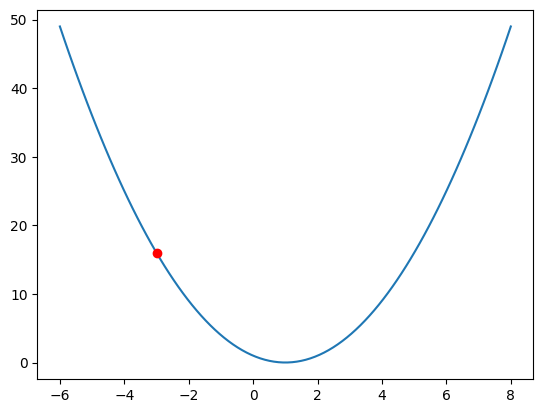

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(_x,(_x-1)**2)
pnts, = ax.plot(x_list[0],loss_list[0],'or')

In [20]:
def animate(i):
    pnts.set_xdata(x_list[:(i+1)])
    pnts.set_ydata(loss_list[:(i+1)])

In [22]:
ani = animation.FuncAnimation(fig,animate,frames=100)
ani